## Visualising the segments using a treemap
##  RFM segment labels have been assigned to the customers in the data set from the SQL RFM analysis, this is used to create a treemap to visualise the data. First, a new dataframe called df_treemap is created that includes the count of the total customers within each RFM segment, then Matplotlib and Squarify are used to create a treemap visualisation.

In [2]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

In [4]:
df = pd.read_csv('RFM_segment_Visualisation.csv')
df.sample(5)

,CUSTOMERNAME,rfm_recency,rfm_frequency,rfm_monetary,rfm_segment
76,L'ordine Souveniers,4,4,4,loyal
69,"Corrida Auto Replicas, Ltd",2,3,4,potential churners
55,Heintze Collectables,2,3,3,potential churners
87,La Rochelle Gifts,4,4,4,loyal
80,Corporate Gift Ideas Co.,3,4,4,"slipping away, cannot lose"


In [5]:
df_treemap = df.groupby('rfm_segment').agg(
    customers=('CUSTOMERNAME', 'count')
).reset_index()

In [6]:
df_treemap.head()

,rfm_segment,customers
0,active,16
1,lost_customers,21
2,loyal,14
3,new customers,6
4,potential churners,18


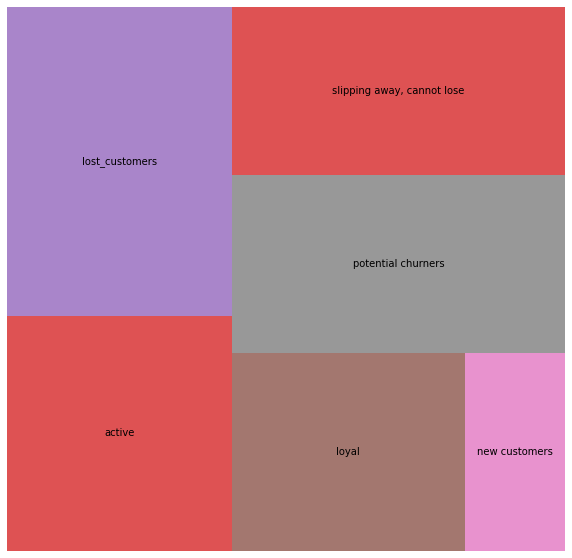

In [7]:
fig, ax = plt.subplots(1, figsize = (10,10))

squarify.plot(sizes=df_treemap['customers'], 
              label=df_treemap['rfm_segment'], 
              alpha=.8,
              color=['tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']
             )
plt.axis('off')
plt.show()

## The treemap gives  a really clear view of the named RFM segments and the relative volumes of customers present in each one. The lost_customers and potential churners  segments could  dumped into a “churned” segment using an alternative binning approach and can be excluded from costly marketing activity.

## Further reading
## Kabaskal, İ., 2020. Customer Segmentation Based On Recency Frequency Monetary Model: A Case Study in E-Retailing. International Journal of InformaticsTechnologies, 13(1).

## Putler Analytics – RFM analysis for successful customer segmentation, https://www.putler.com/rfm-analysis, 26.04.2019.

## Uysal, Ü.C., 2019. RFM-based Customer Analytics in Public Procurement Sector (Doctoral dissertation, Ankara Yıldırım Beyazıt Üniversitesi Sosyal Bilimler Enstitüsü).